<a href="https://colab.research.google.com/github/Priyanshu27083/ML_lab/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
from scipy.spatial.distance import minkowski

# --- 1. Load and Preprocess Data ---
# Load the dataset
df = pd.read_csv('/content/Live.csv')

# Drop empty columns and rows with missing values
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df.dropna(inplace=True)

# Select numerical features for clustering
# We exclude categorical and identifier columns
X = df.drop(['status_id', 'status_type', 'status_published'], axis=1)

# Scale the data for distance-based algorithms
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Similarity and Distance measures

In [3]:
print("\n--- Distance and Similarity Measures ---")
# Take two sample points from the scaled data to demonstrate
point1 = X_scaled[0]
point2 = X_scaled[1]
point1_r = point1.reshape(1, -1) # Reshape for sklearn functions
point2_r = point2.reshape(1, -1)

# i. Euclidean Distance
euclidean_dist = euclidean_distances(point1_r, point2_r)
print(f"Euclidean Distance: {euclidean_dist[0][0]}")

# ii. Manhattan Distance
manhattan_dist = manhattan_distances(point1_r, point2_r)
print(f"Manhattan Distance: {manhattan_dist[0][0]}")

# iii. Cosine Similarity (Note: 1 - cosine_distance)
cosine_sim = cosine_similarity(point1_r, point2_r)
print(f"Cosine Similarity: {cosine_sim[0][0]}")

# iv. Minkowski Distance
# p=1 is Manhattan, p=2 is Euclidean
minkowski_dist_p1 = minkowski(point1, point2, p=1)
minkowski_dist_p2 = minkowski(point1, point2, p=2)
print(f"Minkowski Distance (p=1, Manhattan): {minkowski_dist_p1}")
print(f"Minkowski Distance (p=2, Euclidean): {minkowski_dist_p2}")

# v. Jaccard Index
# Jaccard is for sets, not continuous data. This is a generic example.
def jaccard_index(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

set_a = {1, 2, 3, 5, 7}
set_b = {1, 3, 4, 6, 7}
jaccard_sim = jaccard_index(set_a, set_b)
print(f"Jaccard Index (example sets): {jaccard_sim}")


--- Distance and Similarity Measures ---
Euclidean Distance: 3.3515103599583416
Manhattan Distance: 7.537998168721355
Cosine Similarity: -0.8376643598549327
Minkowski Distance (p=1, Manhattan): 7.537998168721355
Minkowski Distance (p=2, Euclidean): 3.351510359958342
Jaccard Index (example sets): 0.42857142857142855


K Means

Running K-Means...


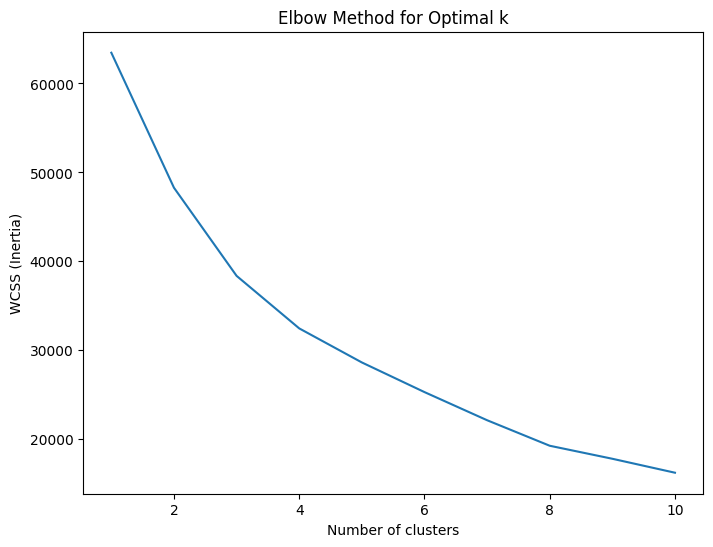

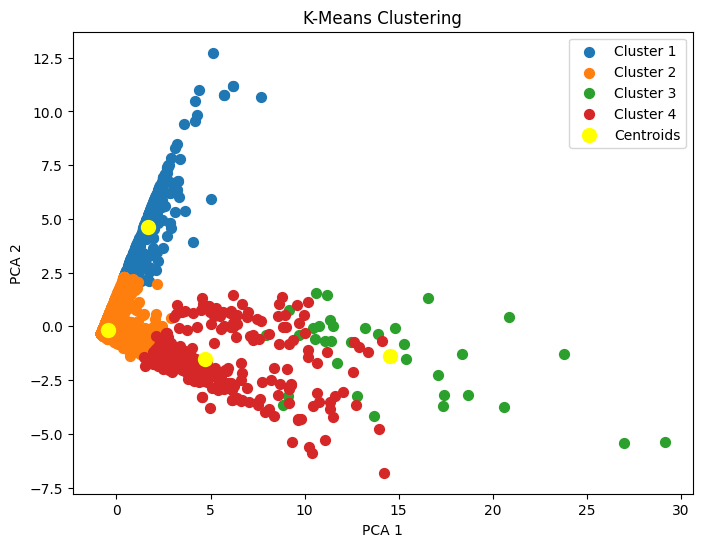

In [4]:
print("Running K-Means...")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.savefig('elbow_method.png')
plt.show()

# Based on the elbow plot, choose the optimal k (e.g., k=4)
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualize K-Means clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], s=50, label=f'Cluster {i+1}')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], s=100, c='yellow', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.savefig('kmeans_clusters.png')
plt.show()

Hierarchial Linkage


Running Hierarchical Clustering...


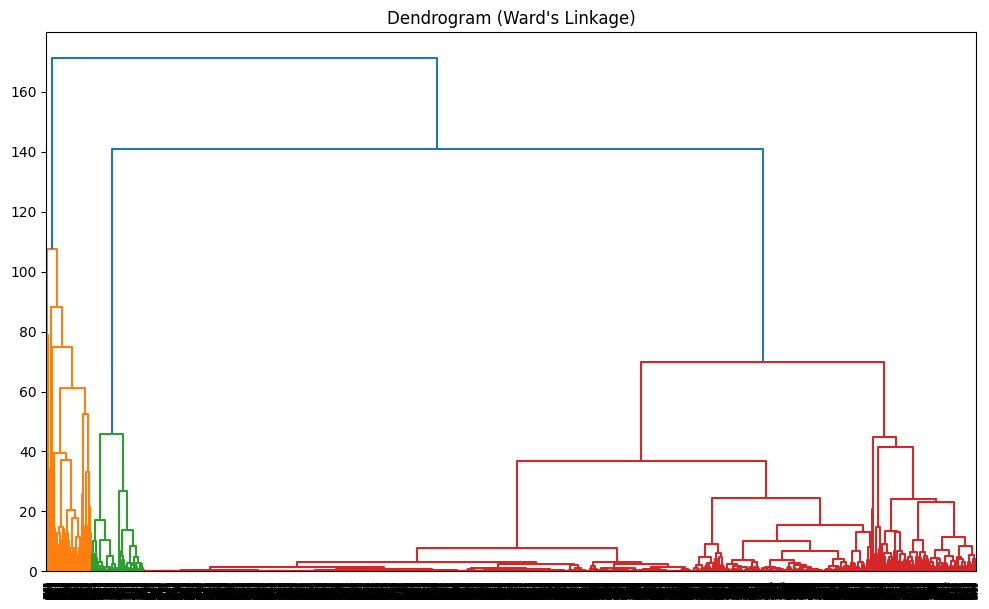

In [5]:
print("\nRunning Hierarchical Clustering...")
# Create the Dendrogram to visualize linkages
plt.figure(figsize=(12, 7))
plt.title("Dendrogram (Ward's Linkage)")
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.savefig('dendrogram_ward.png')
plt.show()

Agglomerative clustering with different linkages

In [ ]:
for linkage in ['ward', 'complete', 'average', 'single']:
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    y_agg = agglomerative.fit_predict(X_scaled)

    plt.figure(figsize=(8, 6))
    for i in range(k):
        plt.scatter(X_pca[y_agg == i, 0], X_pca[y_agg == i, 1], s=50, label=f'Cluster {i+1}')
    plt.title(f'Agglomerative Clustering ({linkage} linkage)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.savefig(f'agglomerative_{linkage}.png')
    plt.show()


BIRCH

In [ ]:
print("\nRunning BIRCH...")
birch = Birch(n_clusters=k)
y_birch = birch.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[y_birch == i, 0], X_pca[y_birch == i, 1], s=50, label=f'Cluster {i+1}')
plt.title('BIRCH Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.savefig('birch_clusters.png')
plt.show()

DBSCAN

In [ ]:
print("\nRunning DBSCAN...")
# Find optimal 'eps' using a k-distance graph
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)
distances = np.sort(distances[:, 10], axis=0)

plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('11th Nearest Neighbor Distance')
plt.savefig('dbscan_knee.png')
plt.show()

# From the graph, find the "knee" and choose that as eps (e.g., eps=4)
eps_val = 4
dbscan = DBSCAN(eps=eps_val, min_samples=11)
y_dbscan = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
unique_labels = set(y_dbscan)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for j, col in zip(unique_labels, colors):
    if j == -1:
        col = [0, 0, 0, 1]  # Black for noise points
    class_member_mask = (y_dbscan == j)
    xy = X_pca[class_member_mask]
    label = 'Noise' if j == -1 else f'Cluster {j+1}'
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6, label=label)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.savefig('dbscan_clusters.png')
plt.show()


Spectral Clustering

In [ ]:
print("\nRunning Spectral Clustering...")
spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=0)
y_spectral = spectral.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[y_spectral == i, 0], X_pca[y_spectral == i, 1], s=50, label=f'Cluster {i+1}')
plt.title('Spectral Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.savefig('spectral_clusters.png')
plt.show()
